# Jedwin Villanueva - 834671
## Statistical Mechanics 2021 Assignment 1

# Q1

These rules make sense, since firstly, trees would randomly be spread across a forest which is reflected by the initial random mixture of tree cells and empty sites. Then, a tree could spontaneously burn, caused by extreme heat and some sort of ignition, or perhaps even by lightning. This is reflected by the fact that a tree cell can become a fire cell with probability f. The spreading of fire occurs since trees in a forest become in contact with a burning tree, and this is accounted for in the model by having a tree cell become a fire cell if one of its neighbours is a fire cell. Then, a red cell becoming an empty cell is for the fact that a scorched tree in a forest can no longer be burned again, and is no longer a living tree. Finally, an empty cell regrowing to a tree cell is for the fact that trees can regrow in random places in a forest at any given time, albeit slowly.

# Q2

I have written code in ForestFires.py which declares a ForestFire class. It initialises a grid of cells, with variables --grid_size (-g), --no_trees (-n_t), --prob_burn (-f), --prob_regrow (-p), --no_steps (-s) declared as arguments on the terminal. While these are interpreted as optional arguments by the argsparser, the code will not run properly unless values are entered for these arguments.

The class methods implement the 4 rules synchronously for 1 step, by the ForeFire.step() method. Note that the fire spreads to the 4 nearest neighbours (up, down, left, and right) with periodic boundary conditions, so in fact the grid is isotropic. Hence the grid can be thought of topologically as a sphere, for example the model can be thought of as a simple model of the Earth filled with trees.

There are also other methods to measure number of fire cells, number of tree cells, and waiting times between fires for 50 chosen cells.

There is also an optional argument --save True (False by default) if a gif of the animation is desired with the previous variables. The animation works seamlessly on the terminal however it does not work interactively within Jupyter Notebook. So running on the terminal is required for animation purposes. Note I have included example .gif files.

Example commands on Terminal:

In [ ]:
python animate.py -g 100 -n_t 0.5 -f 0.0001 -p 0.01 -s 200

The above command runs the animation for a 100x100 gridside, 0.5 initial fraction of trees filling the grid, f and p as stated in the problem, and 200 timesteps. Note that there is no --save True argument written here, hence the value for --save will be False by defualt, and so there will be no .gif animation saved after the code runs.

Another example which saves a 1000x1000 grid, with 1000 time_steps:

In [ ]:
python animate.py -g 1000 -n_t 0.5 -f 0.0001 -p 0.01 -s 1000 --save True

Provided everything is installed (Matplotlib, Numpy, and perhaps Pillow or ImageMagick for rendering the gif files), then the code should show a live animation, then it will re-run the code but this time saving the animation.

If in doubt, write 'python animate.py --help' or 'python animate.py -h'.

You should see the following text if you type --help or -h as an argument:

In [51]:
!python animate.py -h

usage: animate.py [-h] [--grid_size GRID_SIZE] [--no_trees NO_TREES]
                  [--prob_burn PROB_BURN] [--prob_regrow PROB_REGROW]
                  [--no_steps NO_STEPS] [--save SAVE]

optional arguments:
  -h, --help            show this help message and exit
  --grid_size GRID_SIZE, -g GRID_SIZE
                        Set the square gridsize. Recommended: 50-1000
  --no_trees NO_TREES, -n_t NO_TREES
                        Set initial fraction of trees
  --prob_burn PROB_BURN, -f PROB_BURN
                        Set probability of spontaneous burning of a tree
  --prob_regrow PROB_REGROW, -p PROB_REGROW
                        Set probability of an empty site regrowing a tree
  --no_steps NO_STEPS, -s NO_STEPS
                        Set probability of maximum number of steps
  --save SAVE           Set to True if you want to save animation, False
                        otherwise by default


# Q3

The following uses pdf.py, with mostly the same arguments as before, except an additional -r = --no_restarts argument, i.e. the number of samples to determine the PDF of fire sizes after a fixed number of stepsm which usually needs to be very large to determine a suitable PDF.

The code in pdf.py simply initialises the ForestFire grid, updates it by --no_steps number of steps, then measures and returns the number of fire cells after the given number of steps. Then it will re-initialise the grid --no_restarts number of times which is done in parallel to speed up computation, since each sample is independent of each other. The folllowing are the plots of distributions.

## (a) PDF for f=0, p=0.5, after 100 steps with 10000 samples

Time taken: 208.0


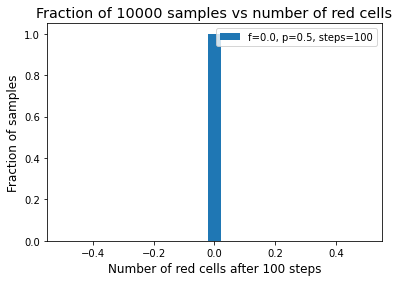

In [57]:
run -i 'pdf.py' -g 100 -n_t 0.5 -f 0 -p 0.5 -s 100 -r 10000

## (b) PDF for f=0.01, p=0.0001, after 500 steps with 10000 samples ($ 0 < p \ll f < 1 $), 

Time taken: 1002.0


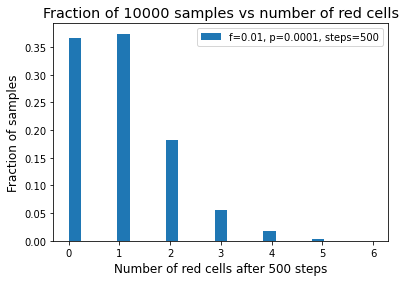

In [3]:
run -i 'pdf.py' -g 100 -n_t 0.5 -f 0.01 -p 0.0001 -s 500 -r 10000

## (c) PDF for f=0.0001, p=0.01, after 500 steps with 10000 samples ($ 0 < f \ll p < 1 $)

Time taken: 1067.0


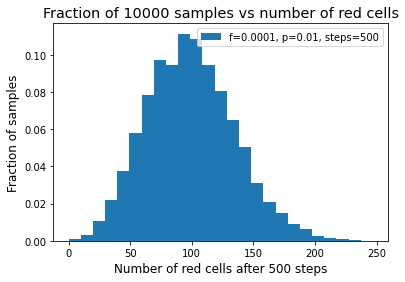

In [1]:
run -i 'pdf.py' -g 100 -n_t 0.5 -f 0.0001 -p 0.01 -s 500 -r 10000

# Q4
Note, the distributions above have up to 25 "bins" total. E.g. for Q3(c) the bins group together 0-9, 10-19, and so on with the far-right bin being 240-249. This causes the ragged look of the PDF. Furthermore, the normalisation of the PDF was done by putting the percentage of the samples on the y-axis, which means that the total shaded area is 1 since this is the total percentage of all samples. The important variables are also included in the top-right legend, omitting the gridsize since this is kept constant at 100x100 for all three sampling distributions.

(a) As can be seen above in Q3(a), when $f=0, p=0.5$ all the samples returned 0 fire cells, which is sensible since f=0 means there is no probability of a tree spontaneously burning, and if no tree ever burns, then no fire would spread. This is also why I set the samples to run only for up to 100 steps as compared to 500 steps for the next two PDFs, since by common sense the grid won't be burning at all at any time step, so the number of fires will already be in a steady state from the beginning, always fixed at 0.

(b) When $ 0 < p \ll f < 1 $, it can be seen that after 500 steps, the number of fire cells stabilises to almost 0 cells (in comparison to 100*100 = 10000 other cells). It makes sense that if the probability of burning is much greater than the probability of regrowing, then eventually almost cells would burn with perhaps a few remaining cells which have regrown to a green cell and burn to a red cell soon after.

(c) When $ 0 < f \ll p < 1 $, the number of burning cells stabilise to some fixed number, in the case above it is given at approximately 100 red cells. Note the fact that a high percentage of samples are centred around s=100 cells means that after 500 steps it is likely that there will be approximately 100 burning red cells. This makes sense again since the probability of regrowing is much greater than the probability of burning, and so the number of trees in a grid recovers faster than the number of trees burn, so there is always some trees to which the fire can spread to.


# Q5

The following code is again a modification of the codes used previously. Here I chose 50 cells to sample and monitor their waiting times between fires. I am able to choose any 50 cells due to the isotropy of the grid (periodic boundary conditions).

## (a) PDF for waiting times for $f=0, p=0.5$

Time taken: 13.0


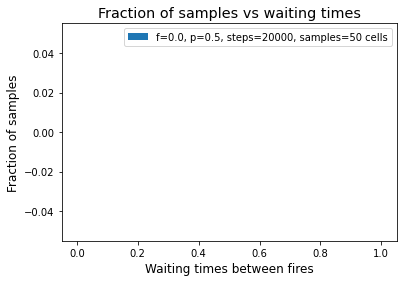

In [2]:
run -i 'waiting.py' -g 100 -n_t 0.5 -f 0 -p 0.5 -s 20000

It makes sense that my code did not return anything, since no tree cell ever burns for f=0, and hence the waiting time is indefinite. 

## (b) PDF for waiting time for $0<p\ll f<1$

Time taken: 1283.0


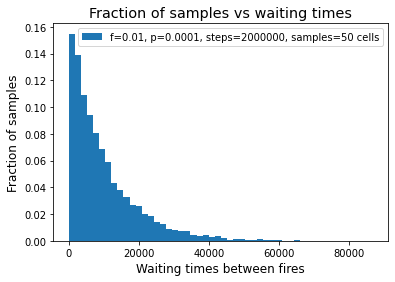

In [3]:
run -i 'waiting.py' -g 100 -n_t 0.5 -f 0.01 -p 0.0001 -s 2000000

Here the sampling returned a distribution spread over magnitudes 0-60000, due to having a high probability of burning, and low probability of regrowing. The lower part of the spectrum reflects the fact that cells which regrow straight after burning are most likely to be burned again while the higher end of the spectrum reflects the fact that cells may have taken a while to regrow and re-burn.

## (b) PDF for waiting time for $0<f \ll p <1$

Time taken: 1693.0


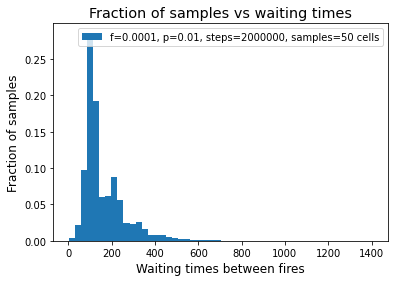

In [5]:
run -i 'waiting.py' -g 100 -n_t 0.5 -f 0.0001 -p 0.01 -s 2000000

Again, as in the previous question's PDF, there is a stable number of burning cells, given $f=0.0001, p=0.01$. This also means that there is a stable number of tree cells after some fixed time, and so it makes sense that the distribution has a high probability for some non-zero waiting time, and also the waiting times cannot be too large, otherwise that would signify the a cell stays mostly green or black, which cannot be true if there is a steady state for the number of red cells and green cells. 

This can be attributed to the fact the the fire must be in motion and cannot be static, i.e. the steady state for number of fires cannot be obtained from having a static set of burning cells.

# Q6 

Let $X_g, X_r$ be respectively the number of green cells and red cells with grid size $N$, so 

\begin{align}
X_g &= N x_g, \\
X_r &= N x_r.
\end{align}

Let's consider 1 timestep $\Delta t = 1$, and for now consider $\Delta X_g$  the change of $X_g$ in one time step.

The rules which changes the number of green cells: 
- A green cell becomes red with probability $f$. Hence there is a term $ - f X_g$ (a decrease),
- A green cell becomes red if one of it's 4 nearest neighbours is red.
  But, the probability that any given cell is red is on average given by $x_r = \dfrac{X_r}{N}$.
  In other words, a green cell becomes red with probability $ 4 x_r$ on average. And so there is a term $ - 4 x_r X_g$ (a decrease).
- A black cell becomes green with probability $p$. But number of black cells = $N-X_g-X_r$. Hence there is a term $+p (N-X_g-X_r)$ (an increase).

\begin{align}
\implies \Delta X_g &= -f X_g - 4 x_r X_g + p(N - X_g - X_r)\\
\implies \Delta(N x_g) &= -f N x_g - 4 x_r (N x_g) + p(N - N x_g - N x_r)\\
\implies \Delta x_g &= -f x_g - 4 x_r x_g + p(1 - x_g - x_r),
\end{align}

noting that N is a constant and was therefore cancelled out in the last step.

Now consider $\Delta X_r$, the change of $X_r$ in one time step. Note that the first two rules listed above apply to the change in the number of red cells, hence the same terms appear except now it comes with a positive sign. In other words the decrease of green cells due to fire spreading correspond to an increase in the red cells by the same amount. However, there is an additional rule for the number of red cells:

- A red cell becomes black (with probability 1). Hence there is a term $-X_r$ (a decrease).

\begin{align}
\implies \Delta X_r &= +f X_g + 4 x_r X_g - X_r \\
\implies \Delta(N x_r) &= f N x_g + 4 x_r (N x_g) - N x_r\\
\implies \Delta x_r &= f x_g + 4 x_r x_g - x_r
\end{align}

Now, when we consider very large number of timesteps, we can think of t as a continuous spectrum and $\Delta t \mapsto \mathrm{d} t$ (the discrete timesteps become infinitesimal over a large time scale). And finally, we can write the desired equations, noting that in the equations above, $\Delta t = 1$ so we can divide it to the LHS to get a rate of change.
\begin{align}
\dfrac{\mathrm{d}x_g}{\mathrm{d}t} &= -f x_g - 4 x_r x_g + p(1 - x_g - x_r), \\
\dfrac{\mathrm{d}x_r}{\mathrm{d}t} &= f x_g + 4 x_r x_g - x_r,
\end{align}

as required.

# Q7

Steady state occurs when $x_g, x_r$ are (approximately) constant with time, that is, 

\begin{align}
\dfrac{\mathrm{d}x_g}{\mathrm{d}t} &= 0, \\
\dfrac{\mathrm{d}x_r}{\mathrm{d}t} &= 0,
\end{align}

which implies,

\begin{align}
0 &= -f x_g - 4 x_r x_g + p(1 - x_g - x_r), \\
0 &= f x_g + 4 x_r x_g - x_r.
\end{align}

Adding the second equation to the first,

\begin{align}
0 &= -x_r + p(1 - x_g - x_r), \\
0 &= f x_g + 4 x_r x_g - x_r.
\end{align}

That is,

\begin{align}
x_r &= p(1 - x_g - x_r),\\
x_r &= f x_g + 4 x_r x_g,
\end{align}
Rearranging the second equation gives, 
\begin{align}
x_r &= x_g ( f + 4 x_r )\\
\Rightarrow x_g &= \dfrac{x_r}{f+4 x_r}
\end{align}

And finally, plugging this into the first equation gives,

\begin{align}
x_r &= p(1 - \dfrac{x_r}{f+4 x_r} - x_r),\\
\Rightarrow x_r (f+ 4 x_r) &= p(f+4 x_r - x_r - x_r(f+4 x_r),\\
\Rightarrow f x_r + 4 (x_r)^2 &= pf + 3p x_r - pf x_r - 4p (x_r)^2,\\
\Rightarrow 0 &= (x_r)^2 (4+4p) + x_r (f-3p+pf) - pf .
\end{align} 

This is a quadratic in $x_r$ and so we can simply use the quadratic formula to give us the (two) solution(s), although we will see later that there is only one of the two is valid. This was done in Mathematica, which gives us the option to also numerically input specific values for $f$ and $p$. The Mathematica code is shown below:

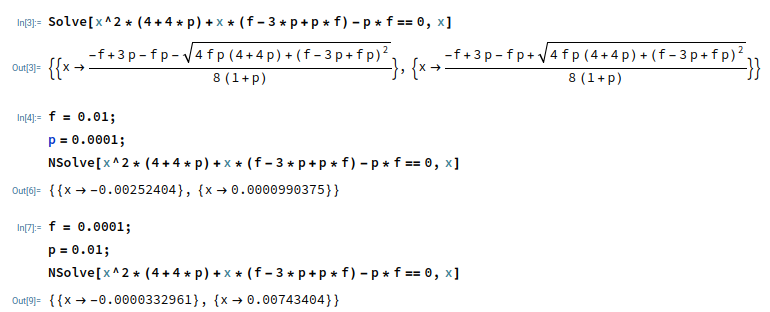,

So we see that the solution (from the quadratic formula) is given by 

$$ x_r = \dfrac{-f+3p-pf \pm \sqrt{ (f-3p+pf)^2 + 4pf(4+4p) } }{8(1+p)},$$

And in fact, since the minus sign solution gives a negative value, we must take the positive square root solution,

$$ x_r = \dfrac{-f+3p-pf + \sqrt{ (f-3p+pf)^2 + 4pf(4+4p) } }{8(1+p)}.$$

It was already shown above that in the case $0 < p \ll f < 1$ with $p=0.0001, f=0.01$, we have $x_r = 0.000099$, which agrees with the previous part, since in the previous part, $N = 100 \times 100 = 10000$, and so $X_r = 10000 x_r = 0.99 \approx 1 $ red cells, which is where the peak of the PDF is. 

As for the case $0 < f \ll p < 1$ with $p=0.01, f=0.0001$, we have $x_r = 0.0074$, and so $X_r = 10000 * x_r = 74$ red cells. This also seems to agree with the PDF obtained previously where the peak was around ~100 red cells (these values have similar orders of magnitude, that is $74 \sim 100 \sim 10^2$ ). Perhaps with a bigger sample size, and more time steps, we would achieve more closely related results, however this would take much longer to do computationally than previously.

Note that the solution above does not recognise the steady solution $f=0, x_r = 0$, since in the algebra we divided by (f+4 x_r) which would be zero given $f=0, x_r = 0$. Instead we note that if $f=0$ we have,

\begin{align}
x_r &= p(1 - x_g - x_r),\\
x_r &= 4 x_r x_g\\
\end{align}

And we note that $(x_r = 0, x_g = 1)$ is a solution for non-zero $p$, which agrees with the numerical simulations above, and as is given by intuition. (I.e. no burning will ever occur if $f=0$ and that over time, trees will fully cover the forest given non-zero $p$.)

# Q8

(1) Instead of having neighbouring cells burn with 100% probability, have the probability of burning be dependent on the distance of a tree cell to a burning cell, in addition to the spontaneous burning probability f, so a tree near a hot burning site has more chance of igniting. This means that the fire may not only spread to the 4 nearest neighbours, but even to the diagonal neighbouring cells with lower probability, and even to non-neighbouring sites (although with much lesser probability).

(2) The model could be made more realistic by adding intermediate stages. E.g. when an empty black cell regrows, it should not be considered a "full" tree but rather a small tree with lesser probability of burning. Another example is to have a fire cell become a "hot" dying cell before becoming black, and it would have leser probability of igniting nearby trees. This is because fires should gradually decrease in size before it extinguishes. So in addition to having black(empty), green(tree) and red(fire) cells, we can add light green(young tree), and orange(dying fire) cells.

(3) Similar to adding an intermediate tree stage (light green cell), we can introduce different shades of green for different types of trees in a forest which have differing probability of catching fire, and also have different probabilities of regrowing, as some trees are more likely to ignite, and some trees regrow faster than others. Moreover these types of trees could also be made different sizes, so instead of having a singular tree cell, one type of tree can be placed inside 2 or more cells, and if one of a tree's cell ignites, then all of the tree's cells ignite.